# Assignment1 Implementing Perceptron for predicting diabetes

## Data Analysis and Clean

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file

In [2]:
# 加载数据
X, y = load_svmlight_file("diabetes_scale.txt")

# 将稀疏矩阵转换为密集矩阵，并构建 DataFrame
X = X.toarray()
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'PedigreeFunction', 'Age']
df = pd.DataFrame(X, columns=columns)
df['Label'] = y.astype(int)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    float64
 1   Glucose           768 non-null    float64
 2   BloodPressure     768 non-null    float64
 3   SkinThickness     768 non-null    float64
 4   Insulin           768 non-null    float64
 5   BMI               768 non-null    float64
 6   PedigreeFunction  768 non-null    float64
 7   Age               768 non-null    float64
 8   Label             768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunction,Age,Label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,-0.547641,0.215020,0.132877,-0.585122,-0.811349,-0.046421,-0.663641,-0.591971,0.302083
std,0.396421,0.321333,0.317308,0.322267,0.272444,0.234997,0.282945,0.392008,0.953903
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858455,-0.900000,-1.000000
50%,-0.647059,0.175879,0.180328,-0.535354,-0.927896,-0.046200,-0.748506,-0.733333,1.000000
75%,-0.294118,0.409547,0.311475,-0.353535,-0.699173,0.090909,-0.531811,-0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Check shape after dropping duplicates
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

# Chek the null values
print(df.isnull().sum())

(768, 9)
(768, 9)
Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
PedigreeFunction    0
Age                 0
Label               0
dtype: int64


## Data Exploratory

Label distribution:
 Label
-1    268
 1    500
Name: count, dtype: int64


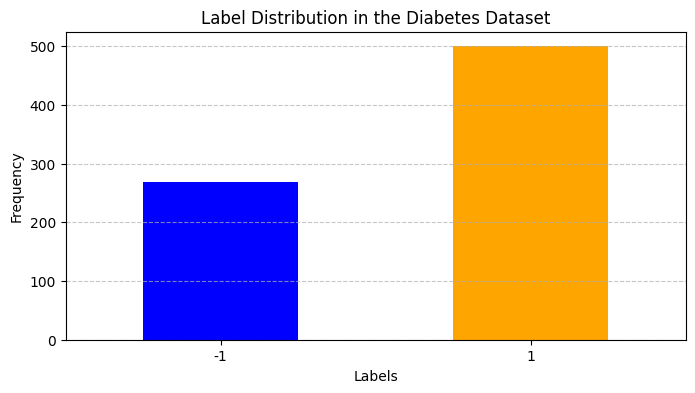

In [6]:
# 统计标签分布
label_counts = df['Label'].value_counts().sort_index()

# 输出标签分布
print("Label distribution:\n", label_counts)

# 可视化标签分布
plt.figure(figsize=(8, 4))
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Distribution in the Diabetes Dataset')
plt.xticks(ticks=np.arange(len(label_counts)), labels=label_counts.index, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

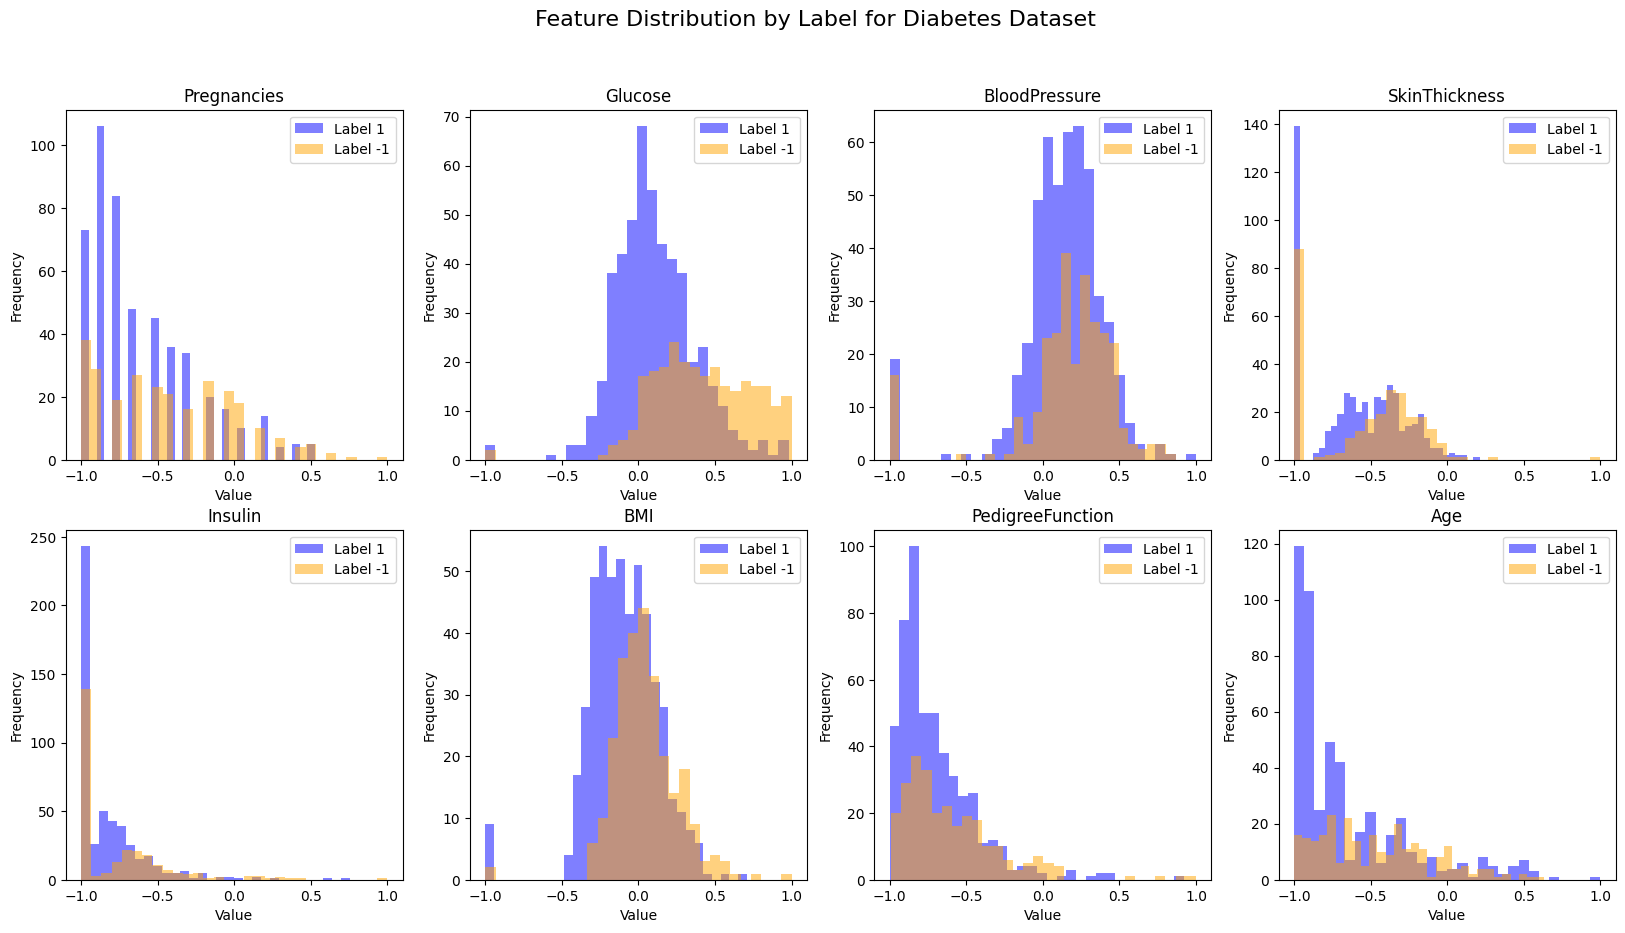

In [7]:
# 创建一个 figure 和多个 subplot，每个特征一个
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Feature Distribution by Label for Diabetes Dataset', fontsize=16)

# 遍历每个特征，并在对应的子图中绘制每个标签的直方图
for i, ax in enumerate(axes.flatten()):
    # 为当前特征的每个标签绘制直方图
    df[df['Label'] == 1][columns[i]].hist(alpha=0.5, ax=ax, bins=30, label='Label 1', color='blue')
    df[df['Label'] == -1][columns[i]].hist(alpha=0.5, ax=ax, bins=30, label='Label -1', color='orange')
    ax.set_title(columns[i])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

    ax.grid(False)

# 显示图形
plt.show()

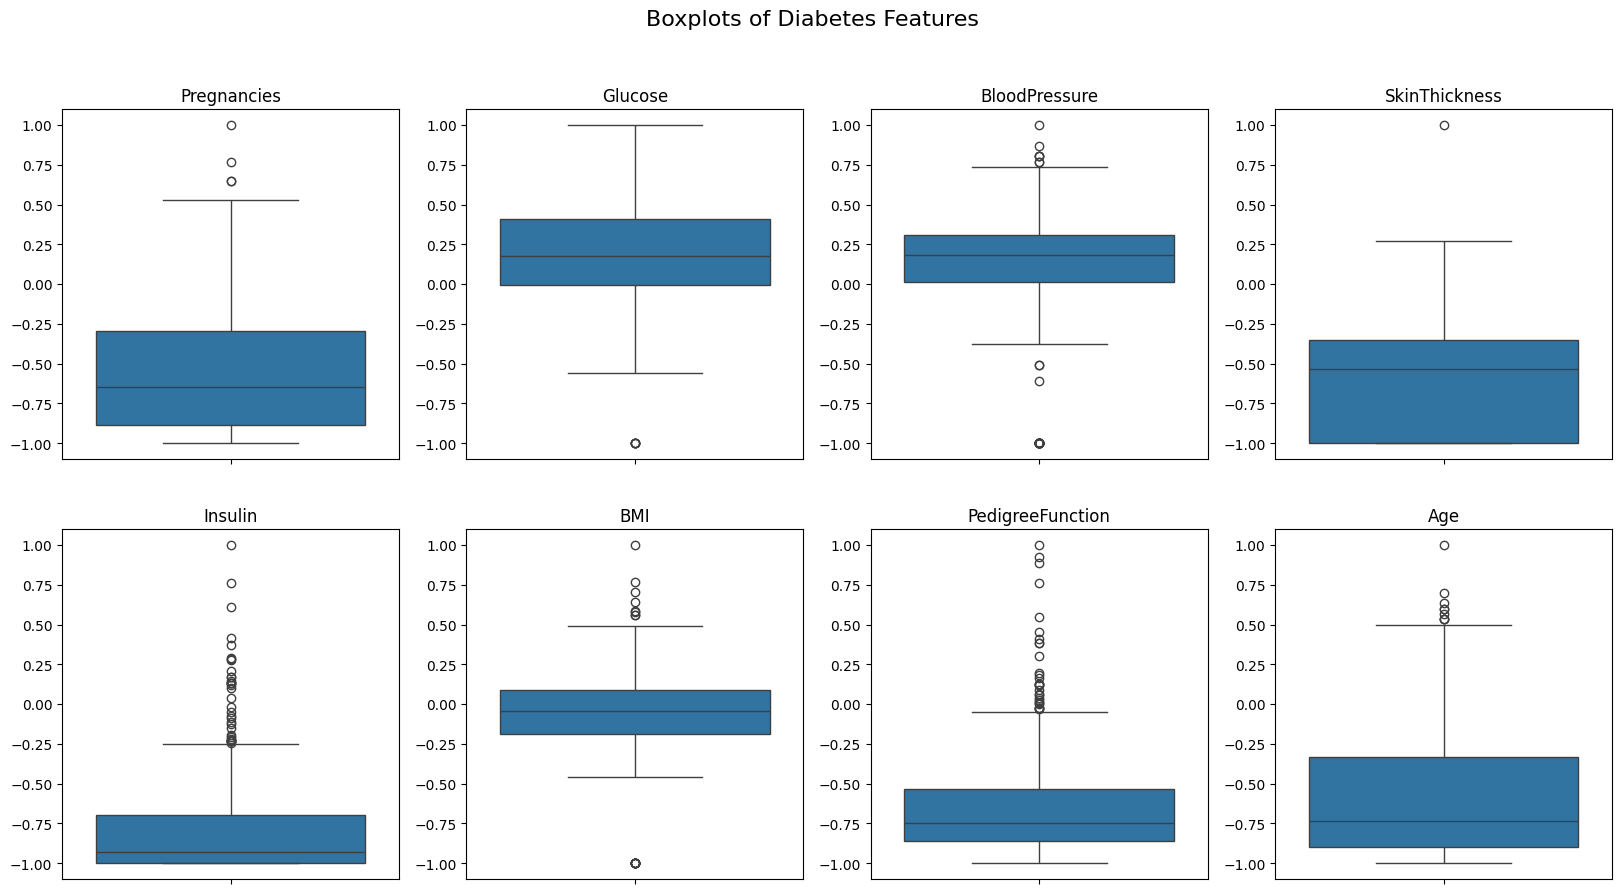

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Boxplots of Diabetes Features', fontsize=16)

# 在每个 subplot 中画 boxplot
for i, col in enumerate(df.columns[:-1]):
    ax = axes[i//4, i%4]
    sns.boxplot(y=df[col], ax=ax, orient='v')
    ax.set_title(col)
    ax.set_ylabel('')

plt.show()


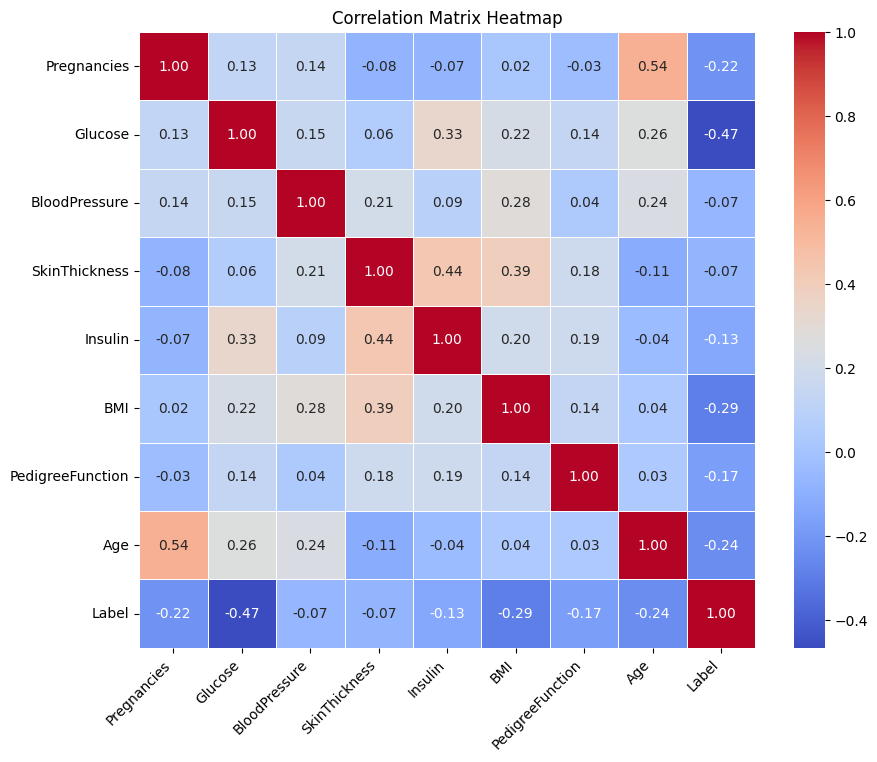

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Split Data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

X_train shape: (491, 8)
X_val shape: (123, 8)
X_test shape: (154, 8)


## Baseline

In [135]:
import torch
import torch.nn as nn

class BasePerceptron(nn.Module):
    def __init__(self, num_features, learning_rate=1, n_iters=10):
        super(BasePerceptron, self).__init__()
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = nn.Parameter(torch.zeros(num_features, 1), requires_grad=False)
        self.bias = nn.Parameter(torch.zeros(1), requires_grad=False)
        self.history = {'weight_changes': [], 'bias_changes': [], 'train_accuracies': [], 'val_accuracies': []}

    def forward(self, x):
        return x @ self.weights + self.bias

    def fit(self, X_train, y_train, X_val, y_val):
        X_train = torch.from_numpy(X_train).float()
        y_train = torch.from_numpy(y_train).float().view(-1, 1)
        X_val = torch.from_numpy(X_val).float()
        y_val = torch.from_numpy(y_val).float().view(-1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X_train):
                linear_output = self.forward(x_i)
                y_predicted = torch.sign(linear_output)

                if y_train[idx] != y_predicted:
                    update = self.lr * y_train[idx] * x_i
                    self.weights.data += update.view(-1, 1)
                    self.bias.data += self.lr * y_train[idx]

                    # Record weight and bias changes
                    self.history['weight_changes'].append(self.weights.data.norm().item())
                    self.history['bias_changes'].append(self.bias.data.item())

            # Calculate and record training accuracy
            train_acc = self._calculate_accuracy(X_train, y_train)
            self.history['train_accuracies'].append(train_acc)

            # Calculate and record validation accuracy
            val_acc = self._calculate_accuracy(X_val, y_val)
            self.history['val_accuracies'].append(val_acc)

    def _calculate_accuracy(self, X, y):
        output = self.forward(X)
        predictions = torch.sign(output)
        correct_predictions = (predictions == y).float().sum()
        accuracy = correct_predictions / y.size(0)
        return accuracy.item()

    def predict(self, X):
        X = torch.from_numpy(X).float()
        linear_output = self.forward(X)
        y_predicted = torch.sign(linear_output)
        return y_predicted.numpy()

In [345]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Defining function for fbeta_scores
def calculate_metrics(y_true, y_pred):
    # -1 是正类（有糖尿病）
    sensitivity = recall_score(y_true, y_pred, pos_label=-1)
    specificity = recall_score(y_true, y_pred, pos_label=1)
    balanced_accuracy = (sensitivity + specificity) / 2

    print("Accuracy:", format(accuracy_score(y_true, y_pred), ".4f"))
    print("Recall:", format(sensitivity, ".4f"))
    print("Precision:", format(precision_score(y_true, y_pred), ".4f"))
    print("F1 Score:", format(f1_score(y_true, y_pred), ".4f"))

    # Display confusion matrix, the row is true label and column is predicted label
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='inferno')
    plt.title('Confusion Matrix Display')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [323]:
def plot_perceptron_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['weight_changes'], label='Weight Norm')
    plt.plot(history['bias_changes'], label='Bias Value')
    plt.title('Parameters changes over updates')
    plt.xlabel('Update Number')
    plt.ylabel('Magnitude')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_accuracies'], label='Train Accuracy')
    plt.plot(history['val_accuracies'], label='Validation Accuracy')
    plt.title('Model Accuracy over epochs')
    plt.xlabel('Epoch Number')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

Accuracy: 0.7154
Recall: 0.2093
Precision: 0.6991
F1 Score: 0.8187


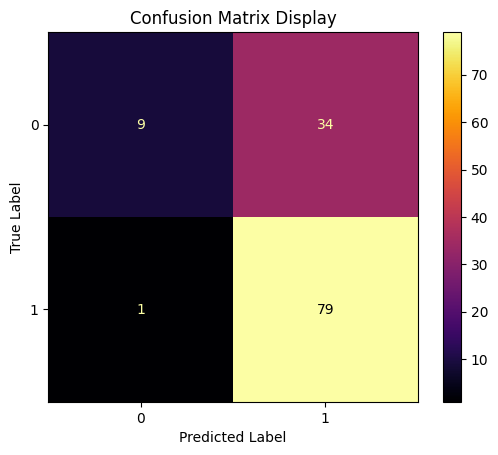

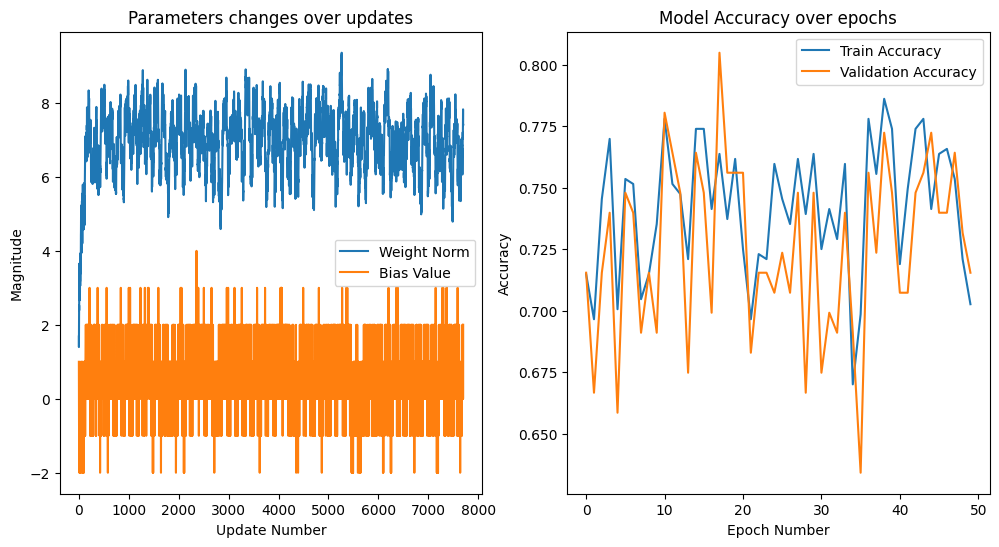

In [148]:
model_baseline = BasePerceptron(num_features=X.shape[1],learning_rate=1, n_iters=50)
model_baseline.fit(X_train, y_train, X_val, y_val)
y_pred = model_baseline.predict(X_val)

calculate_metrics(y_val, y_pred)
plot_perceptron_history(model_baseline.history)

In [255]:
model_accuracies = {
    '(a) percep(baseline)': {'train': [], 'val': []},
    '(b) margin': {'train': [], 'val': []},
    '(c) percep+minibatch': {'train': [], 'val': []},
    '(d) margin+minibatch': {'train': [], 'val': []},
    '(e) percep+shuffle': {'train': [], 'val': []},
    '(f) margin+shuffle': {'train': [], 'val': []}
}
model_accuracies['(a) percep(baseline)']['train'] = model_baseline.history['train_accuracies']
model_accuracies['(a) percep(baseline)']['val'] = model_baseline.history['val_accuracies']

In [216]:
model_weights = {
    '(a) percep(baseline)': {'weight': [], 'bias': []},
    '(b) percep+minibatch': {'weight': [], 'bias': []},
    '(c) margin': {'weight': [], 'bias': []},
    '(d) margin+minibatch': {'weight': [], 'bias': []}
}
model_weights['(a) percep(baseline)']['weight'] = model_baseline.history['weight_changes']
model_weights['(a) percep(baseline)']['bias'] = model_baseline.history['bias_changes']

## Improvement

In [285]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):
    def __init__(self, num_features, learning_rate=1.0, n_iters=10, batch_size=1, shuffle=False):
        super(Perceptron, self).__init__()
        self.lr = learning_rate
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.weights = nn.Parameter(torch.zeros(num_features, 1), requires_grad=False)
        self.bias = nn.Parameter(torch.zeros(1), requires_grad=False)
        self.history = {
            'weight_changes': [],
            'bias_changes': [],
            'train_accuracies': [],
            'val_accuracies': []
        }
        self.best_val_accuracy = 0
        self.best_weights = None
        self.best_bias = None

    def forward(self, x):
        return x @ self.weights + self.bias

    def _sign(self, x):
        return torch.where(x >= 0, 1, -1)

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        X_train = torch.from_numpy(X_train).float()
        y_train = torch.from_numpy(y_train).float().view(-1, 1)
        if X_val is not None and y_val is not None:
            X_val = torch.from_numpy(X_val).float()
            y_val = torch.from_numpy(y_val).float().view(-1, 1)

        n_samples = X_train.shape[0]
        no_improvement = 0

        for epoch in range(self.n_iters):
            if self.shuffle:
                indices = torch.randperm(n_samples)
                X_train = X_train[indices]
                y_train = y_train[indices]

            for start_idx in range(0, n_samples, self.batch_size):
                end_idx = min(start_idx + self.batch_size, n_samples)
                X_batch = X_train[start_idx:end_idx]
                y_batch = y_train[start_idx:end_idx]

                batch_update = torch.zeros_like(self.weights)
                batch_bias_update = 0

                for x_i, y_i in zip(X_batch, y_batch):
                    linear_output = self.forward(x_i)
                    y_predicted = self._sign(linear_output)

                    if y_predicted != y_i:
                        update = y_i * x_i.view(-1, 1)
                        batch_update += update
                        batch_bias_update += y_i

                if len(X_batch) > 0:
                    batch_update /= len(X_batch)
                    batch_bias_update /= len(X_batch)
                    self.weights.data += self.lr * batch_update
                    self.bias.data += self.lr * batch_bias_update
                    # Record weights and biases changes
                    self.history['weight_changes'].append(self.weights.norm().item())
                    self.history['bias_changes'].append(self.bias.item())

            train_acc = self._calculate_accuracy(X_train, y_train)
            self.history['train_accuracies'].append(train_acc)

            if X_val is not None and y_val is not None:
                val_acc = self._calculate_accuracy(X_val, y_val)
                self.history['val_accuracies'].append(val_acc)
                if val_acc > self.best_val_accuracy:
                    self.best_val_accuracy = val_acc
                    self.best_weights = self.weights.clone()
                    self.best_bias = self.bias.clone()
                    no_improvement = 0
                else:
                    no_improvement += 1

                if no_improvement >= 30:
                    print("Early stopping triggered after {} epochs without improvement.".format(epoch + 1))
                    break

        # Load the best model at the end of training
        self.weights.data = self.best_weights.data
        self.bias.data = self.best_bias.data

    def _calculate_accuracy(self, X, y):
        output = self.forward(X)
        predictions = self._sign(output)
        correct = (predictions == y).float().sum()
        return (correct / y.shape[0]).item()

    def predict(self, X):
        X = torch.from_numpy(X).float()
        linear_output = self.forward(X)
        y_predicted = self._sign(linear_output)
        return y_predicted.numpy()

Early stopping triggered after 27 epochs without improvement.
Accuracy: 0.7967
Recall: 0.5349
Precision: 0.7895
F1 Score: 0.8571


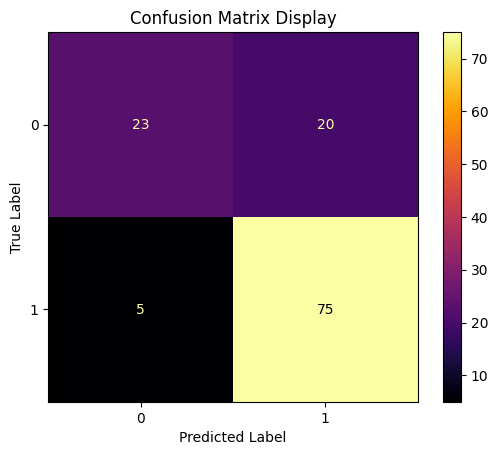

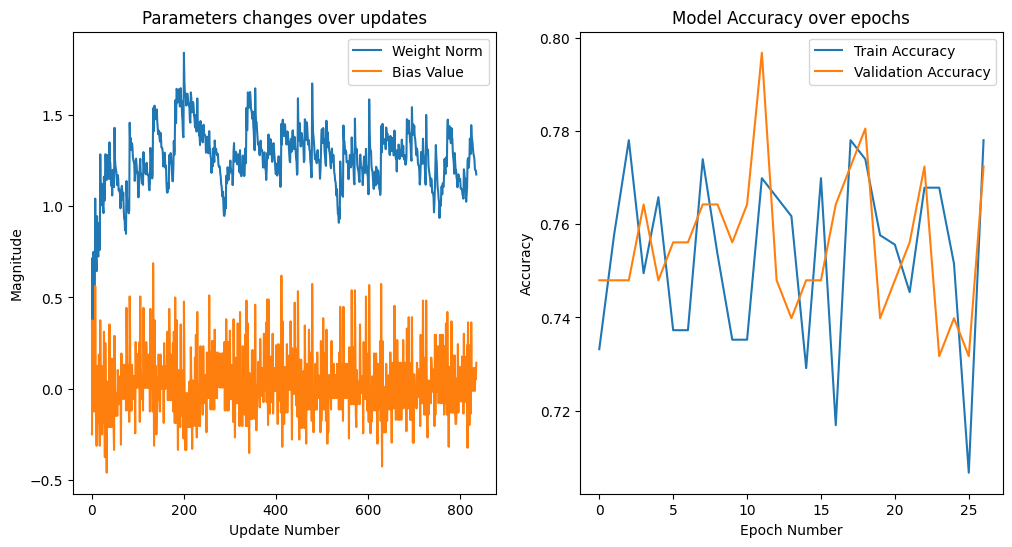

In [193]:
model1 = Perceptron(num_features=X.shape[1],learning_rate=1, n_iters=50, batch_size=16, shuffle=False)
model1.fit(X_train, y_train, X_val, y_val)
y_pred = model1.predict(X_val)

calculate_metrics(y_val, y_pred)
plot_perceptron_history(model1.history)

In [257]:
model_accuracies['(c) percep+minibatch']['train'] = model1.history['train_accuracies']
model_accuracies['(c) percep+minibatch']['val'] = model1.history['val_accuracies']
model_weights['(b) percep+minibatch']['weight'] = model1.history['weight_changes']
model_weights['(b) percep+minibatch']['bias'] = model1.history['bias_changes']

In [195]:
import torch
import torch.nn as nn

class MarginPerceptron(nn.Module):
    def __init__(self, num_features, learning_rate=1.0, n_iters=10, batch_size=1, shuffle=False, margin=1.0):
        super(MarginPerceptron, self).__init__()
        self.lr = learning_rate
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.margin = margin
        self.weights = nn.Parameter(torch.zeros(num_features, 1), requires_grad=False)
        self.bias = nn.Parameter(torch.zeros(1), requires_grad=False)
        self.history = {
            'weight_changes': [],
            'bias_changes': [],
            'train_accuracies': [],
            'val_accuracies': []
        }
        self.best_val_accuracy = 0
        self.best_weights = None
        self.best_bias = None

    def forward(self, x):
        return x @ self.weights + self.bias

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        X_train = torch.from_numpy(X_train).float()
        y_train = torch.from_numpy(y_train).float().view(-1, 1)
        if X_val is not None and y_val is not None:
            X_val = torch.from_numpy(X_val).float()
            y_val = torch.from_numpy(y_val).float().view(-1, 1)

        n_samples = X_train.shape[0]
        no_improvement = 0

        for epoch in range(self.n_iters):
            if self.shuffle:
                indices = torch.randperm(n_samples)
                X_train = X_train[indices]
                y_train = y_train[indices]

            for start_idx in range(0, n_samples, self.batch_size):
                end_idx = min(start_idx + self.batch_size, n_samples)
                X_batch = X_train[start_idx:end_idx]
                y_batch = y_train[start_idx:end_idx]

                batch_update = torch.zeros_like(self.weights)
                batch_bias_update = 0

                for x_i, y_i in zip(X_batch, y_batch):
                    output = self.forward(x_i)
                    margin_violation = 1 - y_i * output
                    loss = max(0, margin_violation.item())

                    if loss > 0:  # Update only if there's a margin violation
                        update = y_i * x_i.view(-1, 1)
                        batch_update += update
                        batch_bias_update += y_i

                if len(X_batch) > 0:
                    # Update model parameters based on the mean hinge loss of the batch
                    batch_update /= len(X_batch)
                    batch_bias_update /= len(X_batch)
                    self.weights.data += self.lr * batch_update
                    self.bias.data += self.lr * batch_bias_update
                    self.history['weight_changes'].append(self.weights.norm().item())
                    self.history['bias_changes'].append(self.bias.item())


            train_acc = self._calculate_accuracy(X_train, y_train)
            self.history['train_accuracies'].append(train_acc)

            if X_val is not None and y_val is not None:
                val_acc = self._calculate_accuracy(X_val, y_val)
                self.history['val_accuracies'].append(val_acc)
                if val_acc > self.best_val_accuracy:
                    self.best_val_accuracy = val_acc
                    self.best_weights = self.weights.clone()
                    self.best_bias = self.bias.clone()
                    no_improvement = 0
                else:
                    no_improvement += 1

                if no_improvement >= 15:
                    print("Early stopping triggered after {} epochs without improvement.".format(epoch + 1))
                    break

        # Load the best model at the end of training
        self.weights.data = self.best_weights.data
        self.bias.data = self.best_bias.data


    def _calculate_accuracy(self, X, y):
        output = self.forward(X)
        predictions = torch.where(output >= self.margin, 1, -1)
        correct = (predictions == y).float().sum()
        return (correct / y.shape[0]).item()

    def predict(self, X):
        X = torch.from_numpy(X).float()
        output = self.forward(X)
        predictions = torch.where(output >= self.margin, 1, -1)
        return predictions.numpy()


Early stopping triggered after 26 epochs without improvement.
Accuracy: 0.7724
Recall: 0.4884
Precision: 0.7708
F1 Score: 0.8409


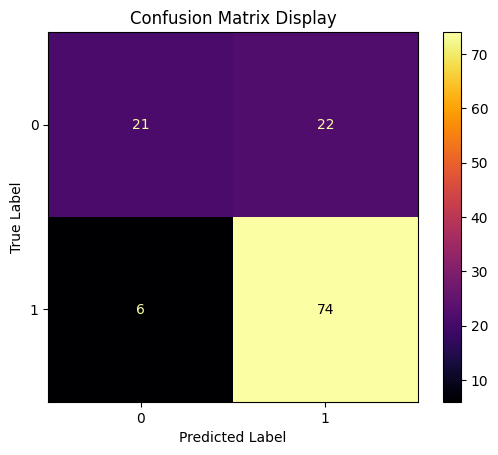

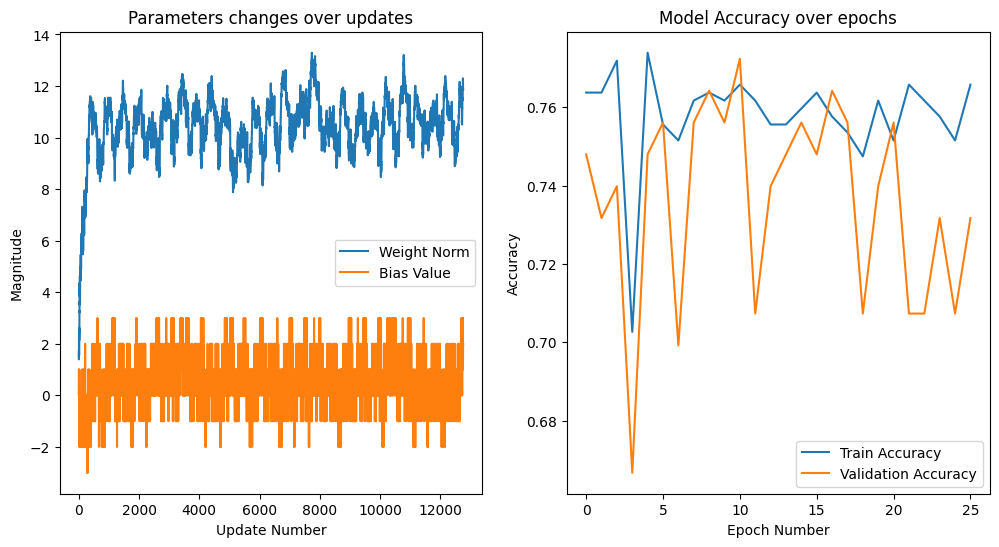

In [196]:
model2 = MarginPerceptron(num_features=X.shape[1],learning_rate=1, n_iters=50, batch_size=1, shuffle=False)
model2.fit(X_train, y_train, X_val, y_val)
y_pred = model2.predict(X_val)

calculate_metrics(y_val, y_pred)
plot_perceptron_history(model2.history)

Early stopping triggered after 19 epochs without improvement.
Accuracy: 0.7805
Recall: 0.6047
Precision: 0.8046
F1 Score: 0.8383


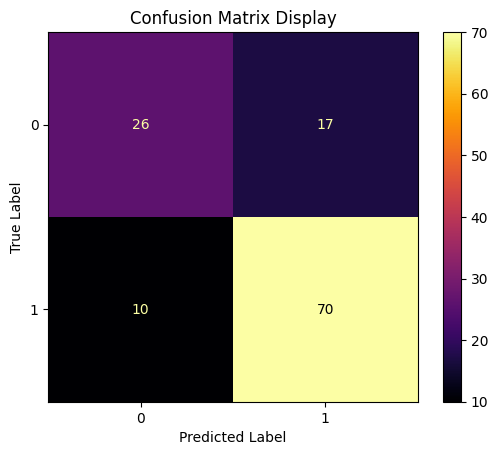

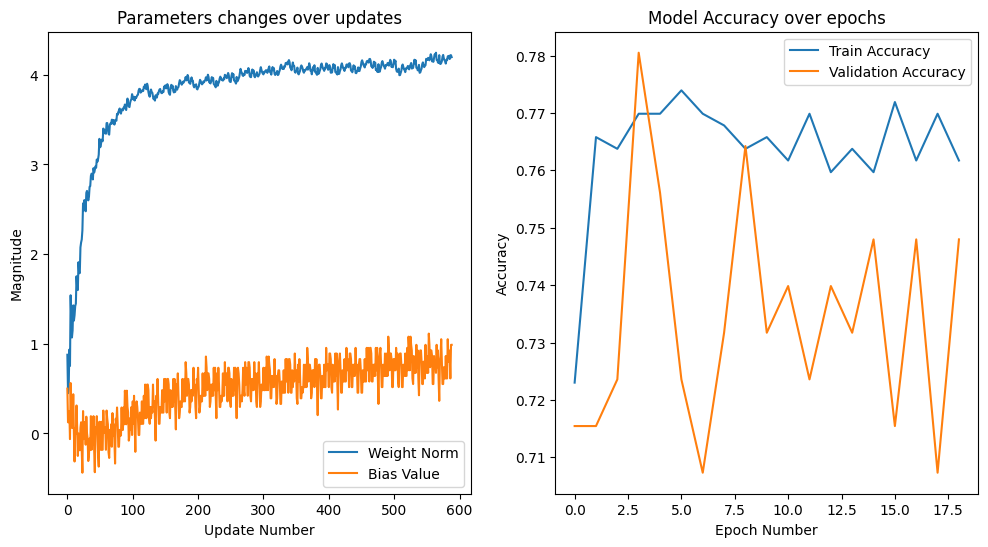

In [197]:
model3 = MarginPerceptron(num_features=X.shape[1],learning_rate=1, n_iters=50, batch_size=16, shuffle=False)
model3.fit(X_train, y_train, X_val, y_val)
y_pred = model3.predict(X_val)

calculate_metrics(y_val, y_pred)
plot_perceptron_history(model3.history)

In [258]:
model_accuracies['(b) margin']['train'] = model2.history['train_accuracies']
model_accuracies['(b) margin']['val'] = model2.history['val_accuracies']
model_weights['(c) margin']['weight'] = model2.history['weight_changes']
model_weights['(c) margin']['bias'] = model2.history['bias_changes']
model_accuracies['(d) margin+minibatch']['train'] = model3.history['train_accuracies']
model_accuracies['(d) margin+minibatch']['val'] = model3.history['val_accuracies']
model_weights['(d) margin+minibatch']['weight'] = model3.history['weight_changes']
model_weights['(d) margin+minibatch']['bias'] = model3.history['bias_changes']

Early stopping triggered after 16 epochs without improvement.
Accuracy: 0.7724
Recall: 0.4884
Precision: 0.7708
F1 Score: 0.8409


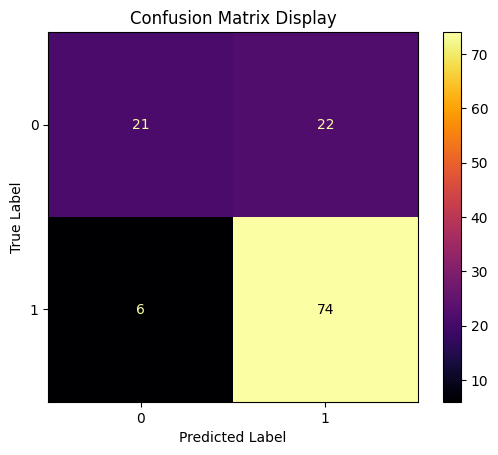

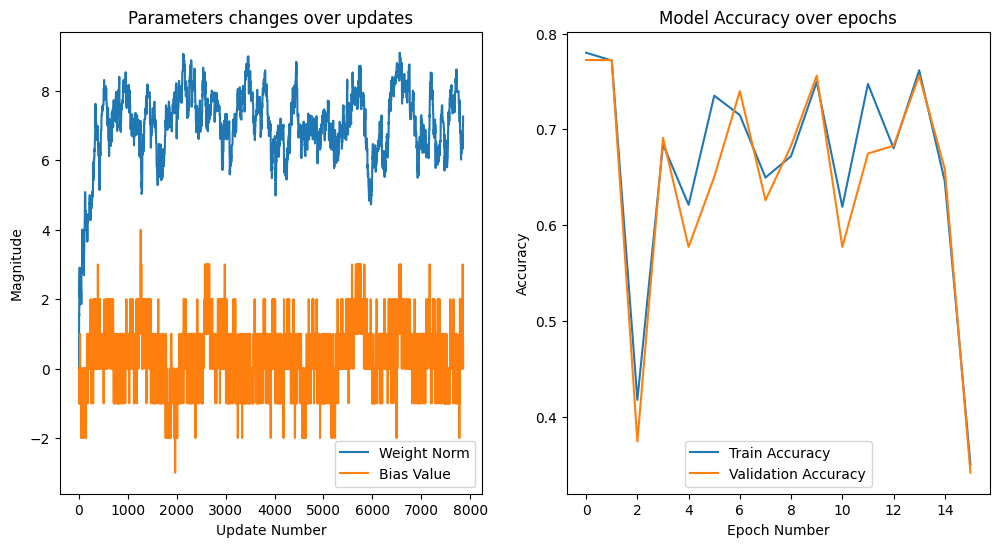

In [259]:
model4 = Perceptron(num_features=X.shape[1],learning_rate=1, n_iters=50, batch_size=1, shuffle=True)
model4.fit(X_train, y_train, X_val, y_val)
y_pred = model4.predict(X_val)

calculate_metrics(y_val, y_pred)
plot_perceptron_history(model4.history)

Early stopping triggered after 22 epochs without improvement.
Accuracy: 0.7724
Recall: 0.5116
Precision: 0.7766
F1 Score: 0.8391


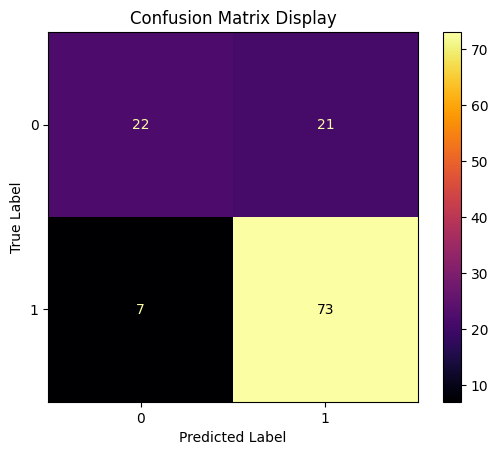

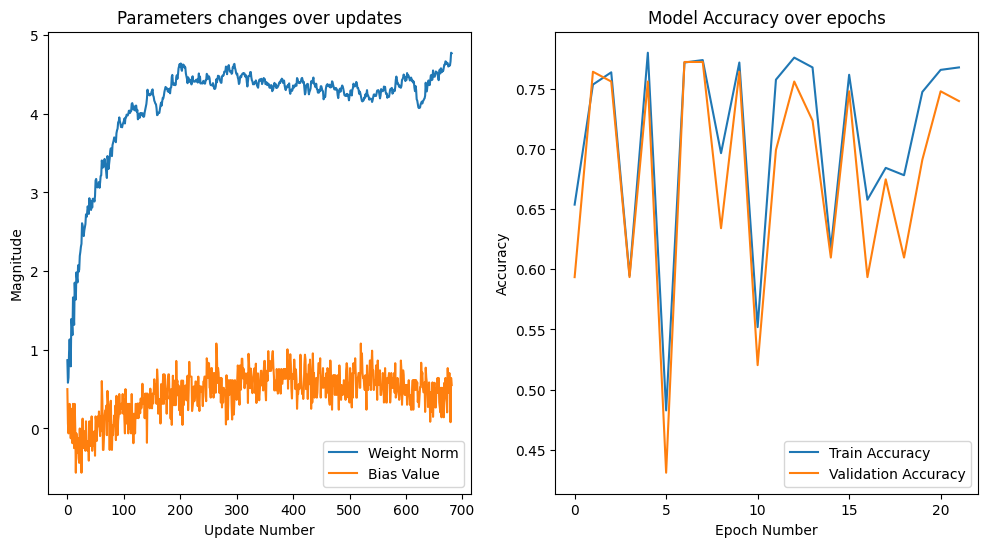

In [260]:
model5 = MarginPerceptron(num_features=X.shape[1],learning_rate=1, n_iters=50, batch_size=16, shuffle=True)
model5.fit(X_train, y_train, X_val, y_val)
y_pred = model5.predict(X_val)

calculate_metrics(y_val, y_pred)
plot_perceptron_history(model5.history)

In [261]:
model_accuracies['(e) percep+shuffle']['train'] = model4.history['train_accuracies']
model_accuracies['(e) percep+shuffle']['val'] = model4.history['val_accuracies']
model_accuracies['(f) margin+shuffle']['train'] = model5.history['train_accuracies']
model_accuracies['(f) margin+shuffle']['val'] = model5.history['val_accuracies']

In [281]:
import matplotlib.pyplot as plt

def plot_model_accuracies(model_accuracies):
    fig, axs = plt.subplots(3, 2, figsize=(6, 9))

    # Flatten the axis for easy iteration
    axs = axs.flatten()

    # Iterate over each model and its accuracies to plot them
    for ax, (model_name, accuracies) in zip(axs, model_accuracies.items()):
        epochs_train = range(1, len(accuracies['train']) + 1)
        epochs_val = range(1, len(accuracies['val']) + 1)

        # Plot training and validation accuracies
        ax.plot(epochs_train, accuracies['train'], label='Train Acc', color='blue')
        ax.plot(epochs_val, accuracies['val'], label='Val Acc', color='red')

        # Set title and labels
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy')
        ax.legend(loc='best')

        # Place model name below the plot
        ax.text(0.5, -0.25, model_name, transform=ax.transAxes, ha='center', va='top', fontsize=12)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



In [389]:
import matplotlib.pyplot as plt

def plot_weight_bias_changes(model_weights):
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))
    axs = axs.flatten()

    # Iterate over each model and its weight and bias changes
    for ax, (model_name, changes) in zip(axs, model_weights.items()):
        epochs = range(1, len(changes['weight']) + 1)

        # Plot weight and bias changes
        ax.plot(epochs, changes['weight'], label='Weight', color='blue')
        ax.plot(epochs, changes['bias'], label='Bias', color='orange')

        # Set title and labels
        ax.set_xlabel('Update number')
        ax.set_ylabel('Magnitude')
        ax.legend(loc='best')

        ax.text(0.5, -0.25, model_name, transform=ax.transAxes, ha='center', va='top', fontsize=12)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

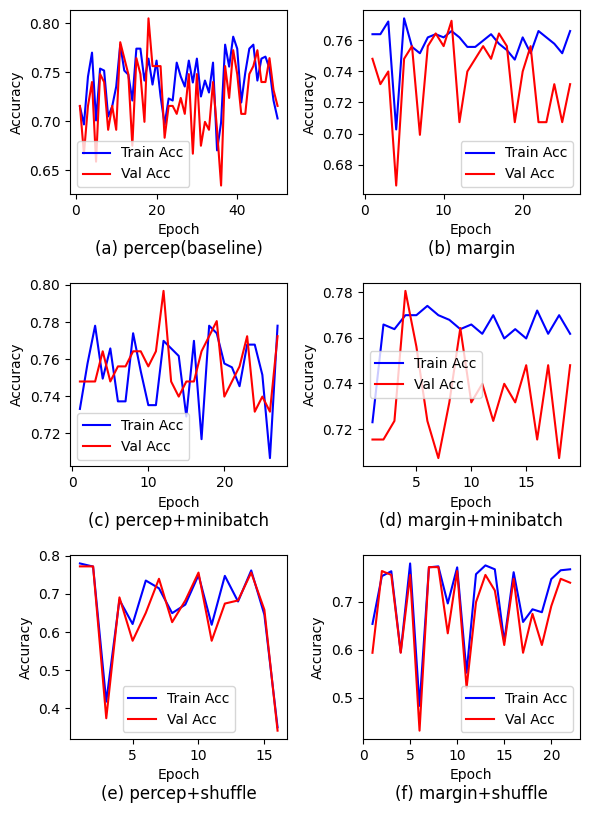

In [282]:
plot_model_accuracies(model_accuracies)

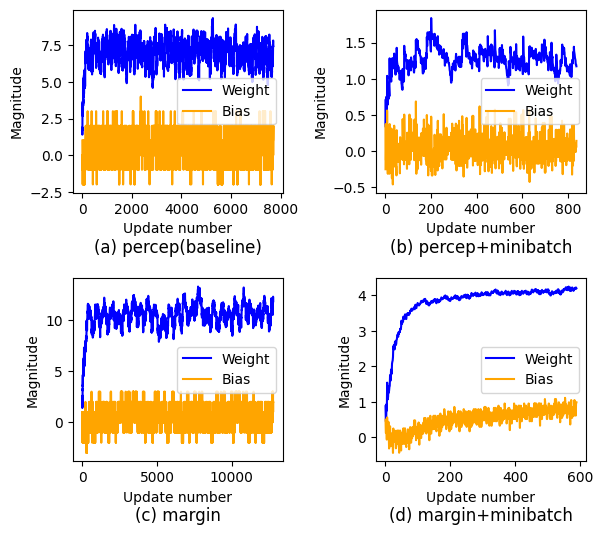

In [390]:
plot_weight_bias_changes(model_weights)

Early stopping triggered after 45 epochs without improvement.
Accuracy: 0.7967
Recall: 0.5581
Precision: 0.7957
F1 Score: 0.8555


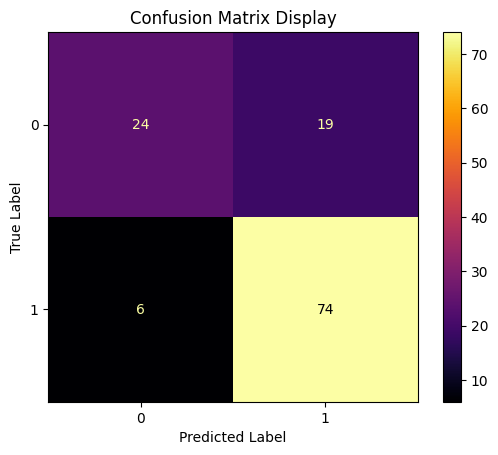

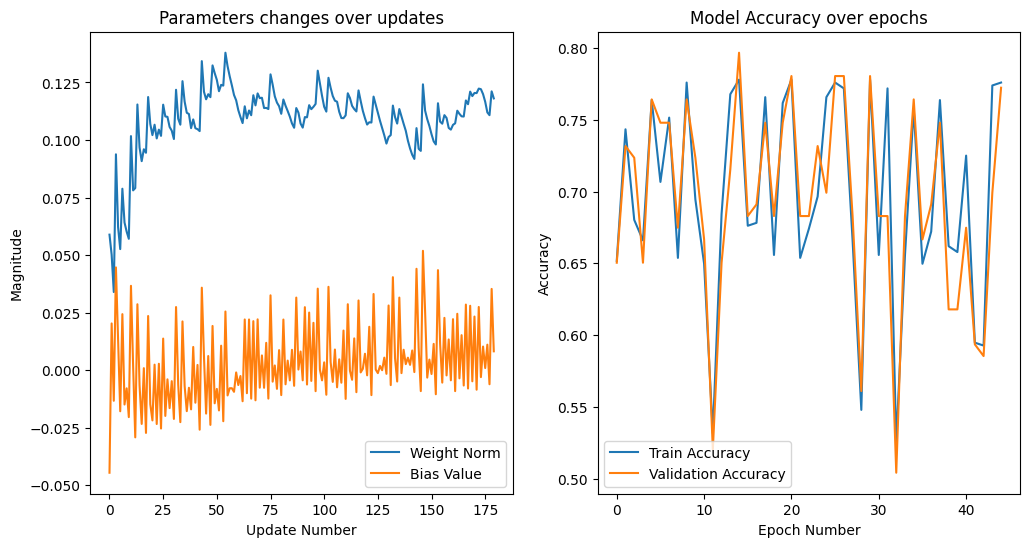

In [287]:
model6 = Perceptron(num_features=X.shape[1],learning_rate=0.1, n_iters=100, batch_size=128, shuffle=True)
model6.fit(X_train, y_train, X_val, y_val)
y_pred = model6.predict(X_val)

calculate_metrics(y_val, y_pred)
plot_perceptron_history(model6.history)

Early stopping triggered after 52 epochs without improvement.
Accuracy: 0.7886
Recall: 0.5116
Precision: 0.7812
F1 Score: 0.8523


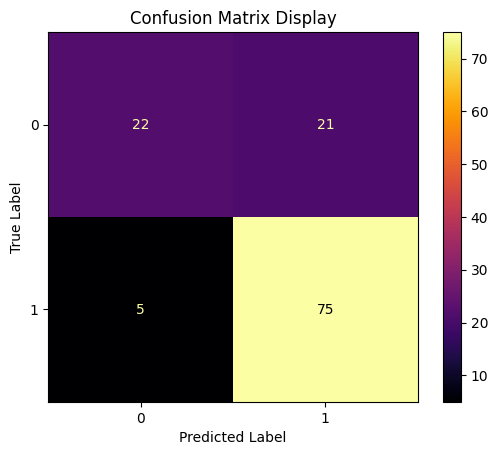

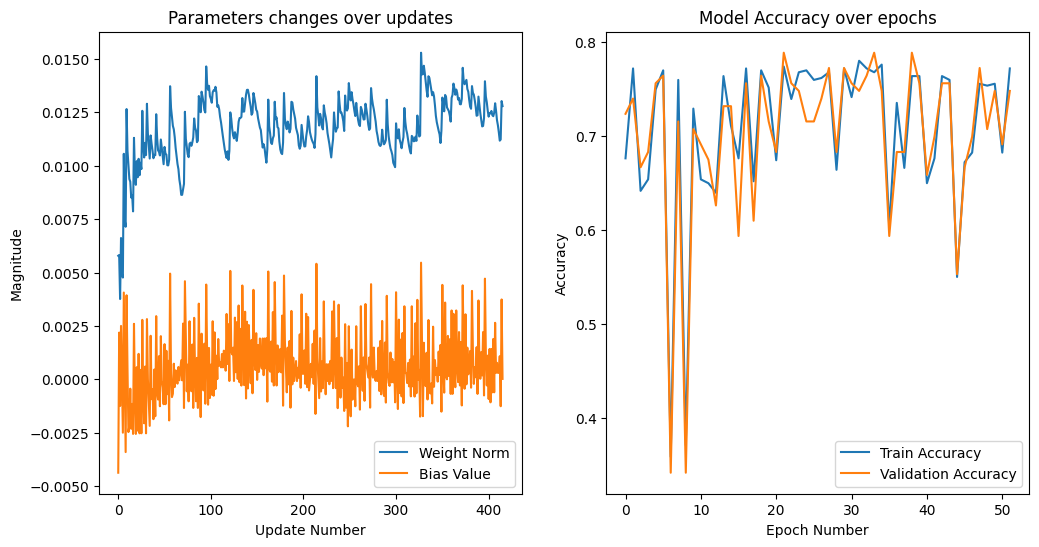

In [290]:
model7 = Perceptron(num_features=X.shape[1],learning_rate=0.01, n_iters=100, batch_size=64, shuffle=True)
model7.fit(X_train, y_train, X_val, y_val)
y_pred = model7.predict(X_val)

calculate_metrics(y_val, y_pred)
plot_perceptron_history(model7.history)

Early stopping triggered after 42 epochs without improvement.
Accuracy: 0.7967
Recall: 0.5349
Precision: 0.7895
F1 Score: 0.8571


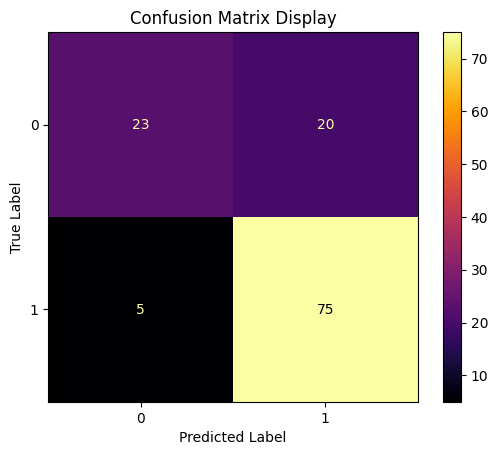

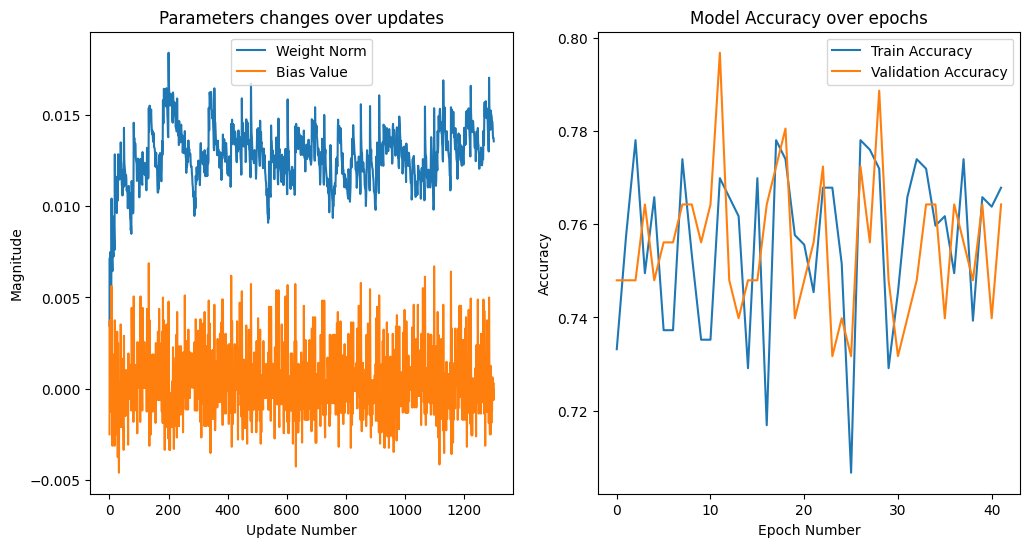

In [292]:
model8 = Perceptron(num_features=X.shape[1],learning_rate=0.01, n_iters= 100, batch_size=16, shuffle=False)
model8.fit(X_train, y_train, X_val, y_val)
y_pred = model8.predict(X_val)

calculate_metrics(y_val, y_pred)
plot_perceptron_history(model8.history)

## Hyperparameter Optimizer

Accuracy: 0.7967
Recall: 0.5349
Precision: 0.7895
F1 Score: 0.8571


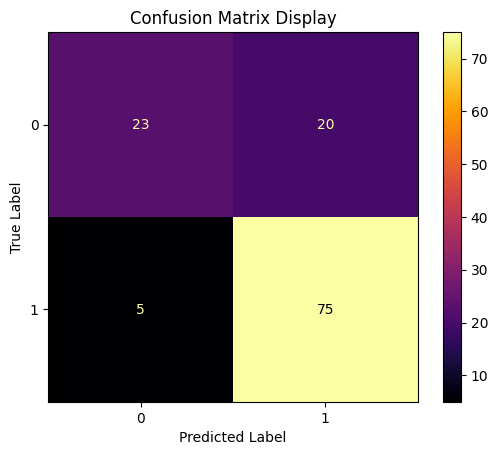

In [351]:
model1 = Perceptron(num_features=X.shape[1], learning_rate=1.000, n_iters=50, batch_size=32, shuffle=True)
model1.fit(X_train, y_train, X_val, y_val)
y_pred1 = model1.predict(X_val)
metrics1 = calculate_metrics(y_val, y_pred1)

Early stopping triggered after 63 epochs without improvement.
Accuracy: 0.7886
Recall: 0.5116
Precision: 0.7812
F1 Score: 0.8523


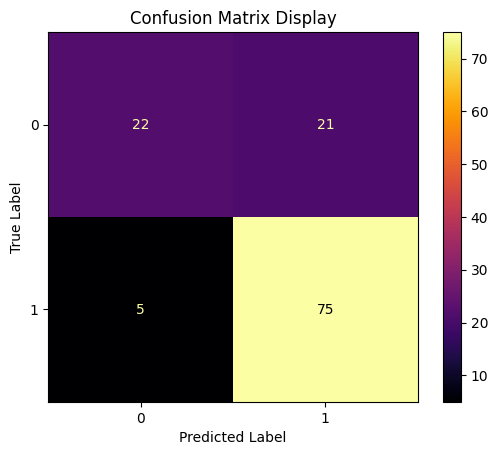

In [352]:
model2 = Perceptron(num_features=X.shape[1], learning_rate=0.100, n_iters=100, batch_size=64, shuffle=True)
model2.fit(X_train, y_train, X_val, y_val)
y_pred2 = model2.predict(X_val)
metrics2 = calculate_metrics(y_val, y_pred2)

Early stopping triggered after 47 epochs without improvement.
Accuracy: 0.7724
Recall: 0.5349
Precision: 0.7826
F1 Score: 0.8372


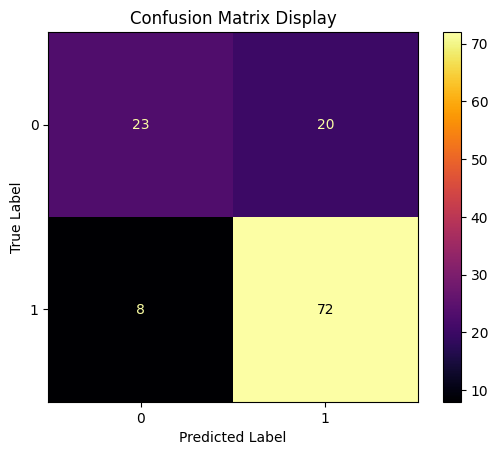

In [353]:
model3 = Perceptron(num_features=X.shape[1], learning_rate=0.010, n_iters=100, batch_size=16, shuffle=True)
model3.fit(X_train, y_train, X_val, y_val)
y_pred3 = model3.predict(X_val)
metrics3 = calculate_metrics(y_val, y_pred3)

Early stopping triggered after 51 epochs without improvement.
Accuracy: 0.7886
Recall: 0.5116
Precision: 0.7812
F1 Score: 0.8523


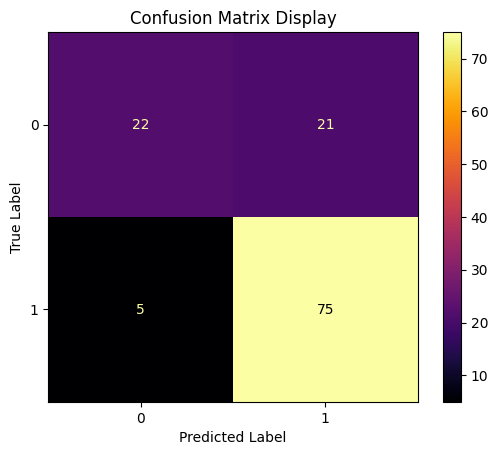

In [354]:
model4 = Perceptron(num_features=X.shape[1], learning_rate=0.010, n_iters=200, batch_size=128, shuffle=True)
model4.fit(X_train, y_train, X_val, y_val)
y_pred4 = model4.predict(X_val)
metrics4 = calculate_metrics(y_val, y_pred4)

Early stopping triggered after 37 epochs without improvement.
Accuracy: 0.7805
Recall: 0.4884
Precision: 0.7732
F1 Score: 0.8475


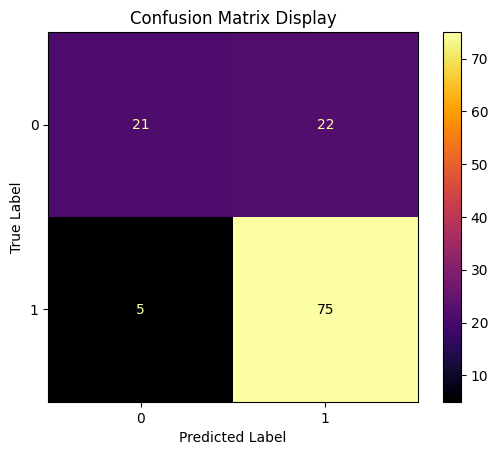

In [355]:
model5 = Perceptron(num_features=X.shape[1], learning_rate=0.001, n_iters=500, batch_size=16, shuffle=True)
model5.fit(X_train, y_train, X_val, y_val)
y_pred5 = model5.predict(X_val)
metrics5 = calculate_metrics(y_val, y_pred5)

Early stopping triggered after 39 epochs without improvement.
Accuracy: 0.7724
Recall: 0.5814
Precision: 0.7955
F1 Score: 0.8333


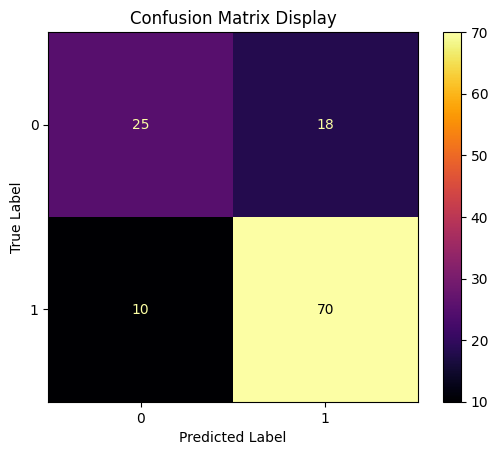

In [356]:
model6 = Perceptron(num_features=X.shape[1], learning_rate=0.001, n_iters=500, batch_size=128, shuffle=True)
model6.fit(X_train, y_train, X_val, y_val)
y_pred6 = model6.predict(X_val)
metrics6 = calculate_metrics(y_val, y_pred6)

Early stopping triggered after 39 epochs without improvement.
Accuracy: 0.7805
Recall: 0.5116
Precision: 0.7789
F1 Score: 0.8457


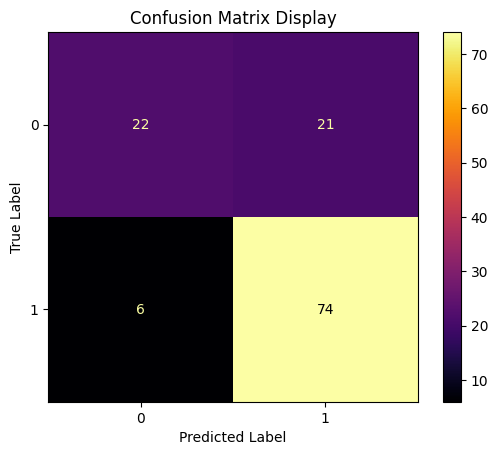

In [357]:
model7 = MarginPerceptron(num_features=X.shape[1], learning_rate=1.000, n_iters=100, batch_size=16, shuffle=True)
model7.fit(X_train, y_train, X_val, y_val)
y_pred7 = model7.predict(X_val)
metrics7 = calculate_metrics(y_val, y_pred7)

Early stopping triggered after 34 epochs without improvement.
Accuracy: 0.7480
Recall: 0.7907
Precision: 0.8657
F1 Score: 0.7891


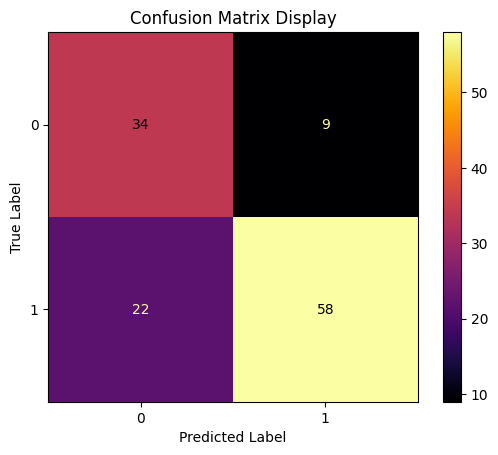

In [358]:
model8 = MarginPerceptron(num_features=X.shape[1], learning_rate=1.000, n_iters=200, batch_size=256, shuffle=True)
model8.fit(X_train, y_train, X_val, y_val)
y_pred8 = model8.predict(X_val)
metrics8 = calculate_metrics(y_val, y_pred8)

Early stopping triggered after 17 epochs without improvement.
Accuracy: 0.6829
Recall: 0.7907
Precision: 0.8475
F1 Score: 0.7194


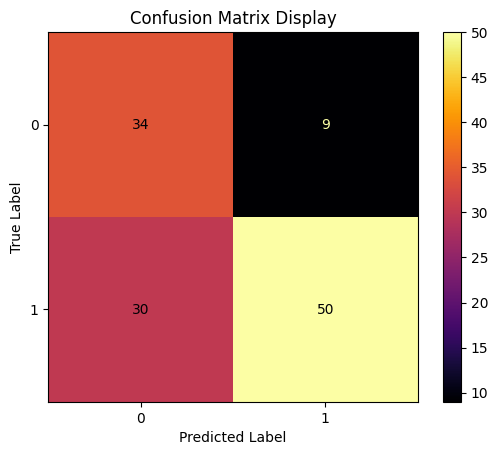

In [359]:
model9 = MarginPerceptron(num_features=X_train.shape[1], learning_rate=0.100, n_iters=100, batch_size=32, shuffle=True)
model9.fit(X_train, y_train, X_val, y_val)
y_pred9 = model9.predict(X_val)
metrics9 = calculate_metrics(y_val, y_pred9)

Early stopping triggered after 18 epochs without improvement.
Accuracy: 0.6179
Recall: 0.7907
Precision: 0.8235
F1 Score: 0.6412


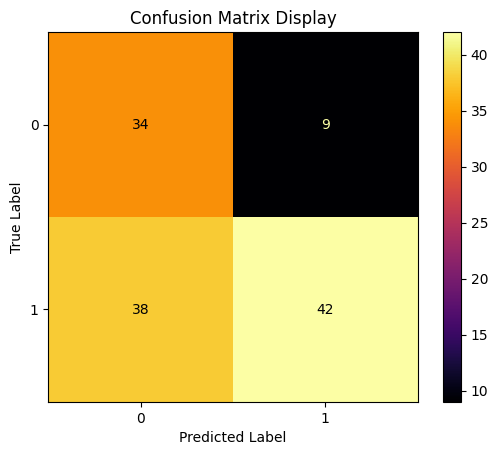

In [375]:
model10 = MarginPerceptron(num_features=X_train.shape[1], learning_rate=0.100, n_iters=200, batch_size=128, shuffle=True)
model10.fit(X_train, y_train, X_val, y_val)
y_pred10 = model10.predict(X_val)
metrics10 = calculate_metrics(y_val, y_pred10)

Early stopping triggered after 22 epochs without improvement.
Accuracy: 0.6098
Recall: 0.8372
Precision: 0.8478
F1 Score: 0.6190


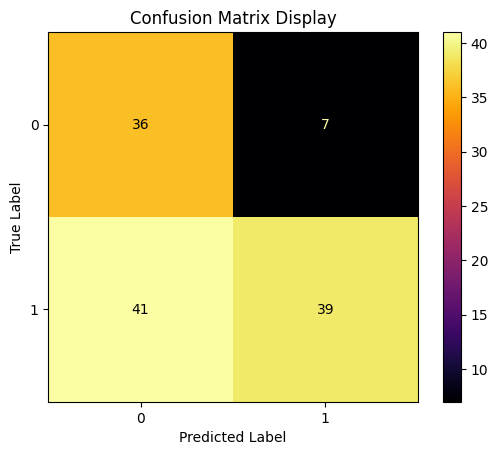

In [361]:
model11 = MarginPerceptron(num_features=X_train.shape[1], learning_rate=0.010, n_iters=200, batch_size=16, shuffle=True)
model11.fit(X_train, y_train, X_val, y_val)
y_pred11 = model11.predict(X_val)
metrics11 = calculate_metrics(y_val, y_pred11)

Early stopping triggered after 24 epochs without improvement.
Accuracy: 0.6098
Recall: 0.8372
Precision: 0.8478
F1 Score: 0.6190


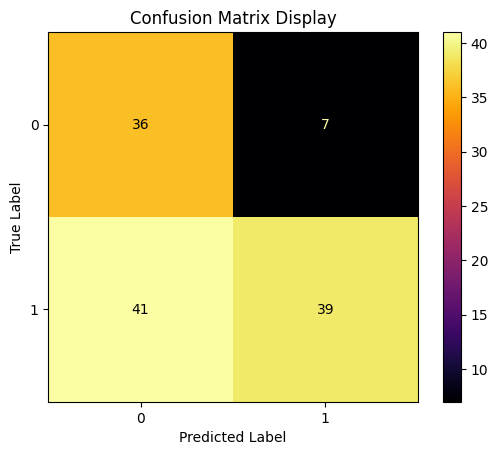

In [362]:
model12 = MarginPerceptron(num_features=X_train.shape[1], learning_rate=0.010, n_iters=500, batch_size=32, shuffle=True)
model12.fit(X_train, y_train, X_val, y_val)
y_pred12 = model12.predict(X_val)
metrics12 = calculate_metrics(y_val, y_pred12)

Early stopping triggered after 16 epochs without improvement.
Accuracy: 0.3496
Recall: 1.0000
Precision: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


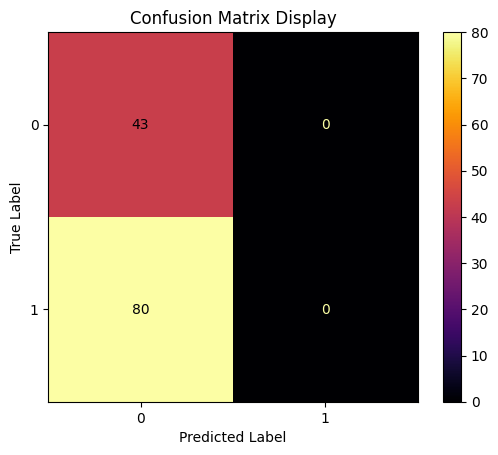

In [363]:
model13 = MarginPerceptron(num_features=X_train.shape[1], learning_rate=0.001, n_iters=200, batch_size=16, shuffle=True)
model13.fit(X_train, y_train, X_val, y_val)
y_pred13 = model13.predict(X_val)
metrics13 = calculate_metrics(y_val, y_pred13)

Early stopping triggered after 16 epochs without improvement.
Accuracy: 0.3496
Recall: 1.0000
Precision: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


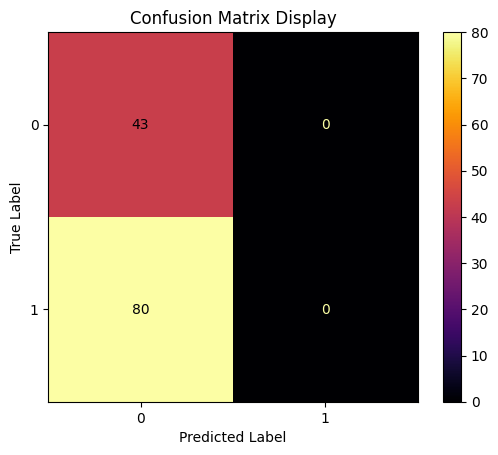

In [364]:
model14 = MarginPerceptron(num_features=X_train.shape[1], learning_rate=0.001, n_iters=500, batch_size=32, shuffle=True)
model14.fit(X_train, y_train, X_val, y_val)
y_pred14 = model14.predict(X_val)
metrics14 = calculate_metrics(y_val, y_pred14)

In [342]:
from itertools import product

def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, pos_label=-1)
    f1 = f1_score(y_true, y_pred)
    return acc, recall, f1

def hyperparameter_optimization(models, lrs, batches, epochs, X_train, y_train, X_val, y_val):
    results = []
    for model_name, Model in models:
        for lr, batch, epoch in product(lrs, batches, epochs):
            model = Model(num_features=X_train.shape[1], learning_rate=lr, n_iters=epoch, batch_size=batch, shuffle=True)
            model.fit(X_train, y_train, X_val, y_val)
            y_pred = model.predict(X_val)
            acc, recall, f1 = calculate_metrics(y_val, y_pred)

            results.append({
                'Model': model_name,
                'Learning Rate': lr,
                'Batch Size': batch,
                'Epochs': epoch,
                'Accuracy': acc,
                'Recall': recall,
                'F1 Score': f1
            })

    # Sort results by Accuracy in descending order
    # results.sort(key=lambda x: x['Accuracy'], reverse=True)
    return results

# Example usage
models = [
    ('Perceptron', Perceptron),
    ('Margin Perceptron', MarginPerceptron)
]
lrs = [0.001, 0.01, 0.1, 1]
batches = [16, 32, 64, 128, 256]
epochs = [50, 100, 200, 500]

results = hyperparameter_optimization(models, lrs, batches, epochs, X_train, y_train, X_val, y_val)


Early stopping triggered after 43 epochs without improvement.
Early stopping triggered after 58 epochs without improvement.
Early stopping triggered after 32 epochs without improvement.
Early stopping triggered after 42 epochs without improvement.
Early stopping triggered after 43 epochs without improvement.
Early stopping triggered after 38 epochs without improvement.
Early stopping triggered after 58 epochs without improvement.
Early stopping triggered after 45 epochs without improvement.
Early stopping triggered after 50 epochs without improvement.
Early stopping triggered after 44 epochs without improvement.
Early stopping triggered after 38 epochs without improvement.
Early stopping triggered after 49 epochs without improvement.
Early stopping triggered after 44 epochs without improvement.
Early stopping triggered after 68 epochs without improvement.
Early stopping triggered after 57 epochs without improvement.
Early stopping triggered after 44 epochs without improvement.
Early st

In [343]:
results.sort(key=lambda x: (x['Accuracy'], x['Recall'], x['F1 Score']), reverse=True)
top_acc_results_df = pd.DataFrame(results[:30])
top_acc_results_df

,Model,Learning Rate,Batch Size,Epochs,Accuracy,Recall,F1 Score
0,Perceptron,0.010,16,200,0.804878,0.558140,0.862069
1,Perceptron,1.000,32,200,0.804878,0.534884,0.863636
2,Perceptron,0.001,16,500,0.796748,0.558140,0.855491
3,Perceptron,0.100,16,50,0.796748,0.558140,0.855491
4,Perceptron,0.010,16,100,0.796748,0.534884,0.857143
5,Perceptron,0.010,32,50,0.796748,0.534884,0.857143
6,Perceptron,0.010,128,200,0.796748,0.534884,0.857143
7,Perceptron,0.100,128,200,0.796748,0.534884,0.857143
8,Perceptron,1.000,16,50,0.796748,0.534884,0.857143
9,Perceptron,1.000,16,200,0.796748,0.534884,0.857143


## Test

Early stopping triggered after 38 epochs without improvement.
Accuracy: 0.7597
Recall: 0.5370
Precision: 0.7788
F1 Score: 0.8263


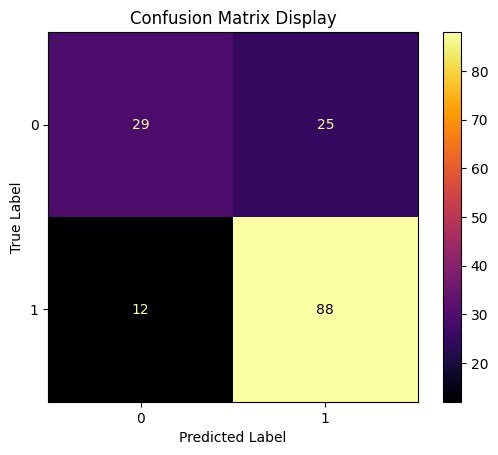

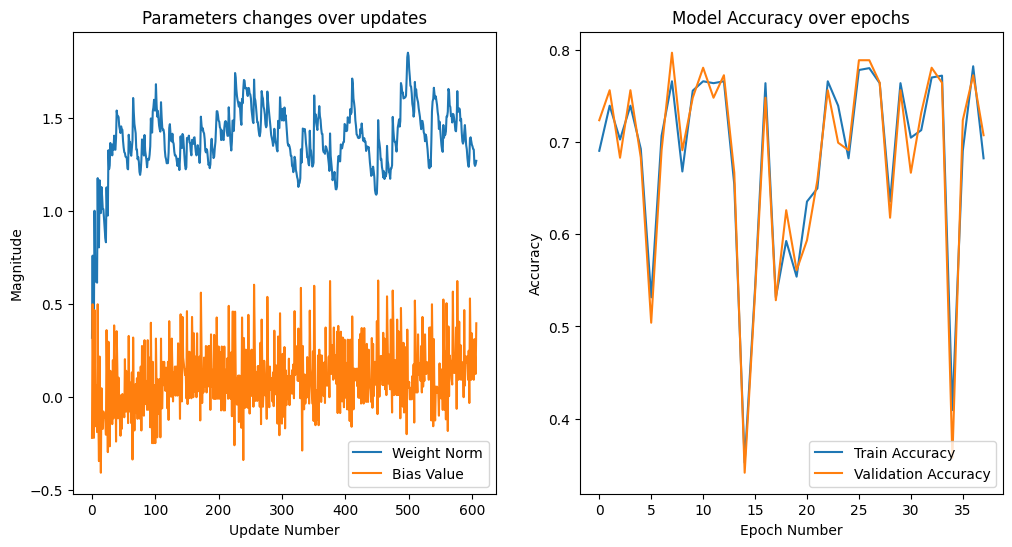

In [382]:
best_model = Perceptron(num_features=X.shape[1], learning_rate=1, n_iters=50, batch_size=32, shuffle=True)
best_model.fit(X_train, y_train, X_val, y_val)

y_pred = best_model.predict(X_test)
calculate_metrics(y_test, y_pred)
plot_perceptron_history(best_model.history)

Early stopping triggered after 49 epochs without improvement.
Accuracy: 0.7597
Recall: 0.7778
Precision: 0.8621
F1 Score: 0.8021


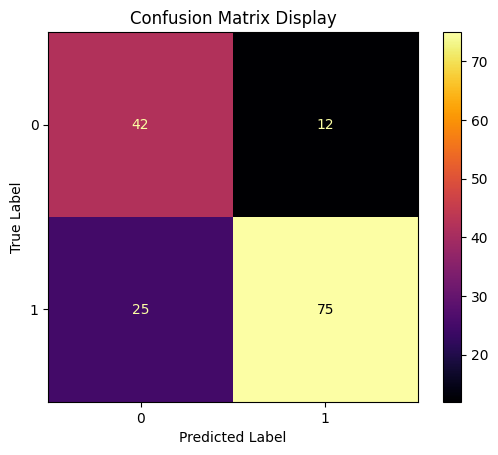

In [376]:
best_model = MarginPerceptron(num_features=X.shape[1], learning_rate=1, n_iters=200, batch_size=256, shuffle=True)
best_model.fit(X_train, y_train, X_val, y_val)

y_pred = best_model.predict(X_test)
calculate_metrics(y_test, y_pred)

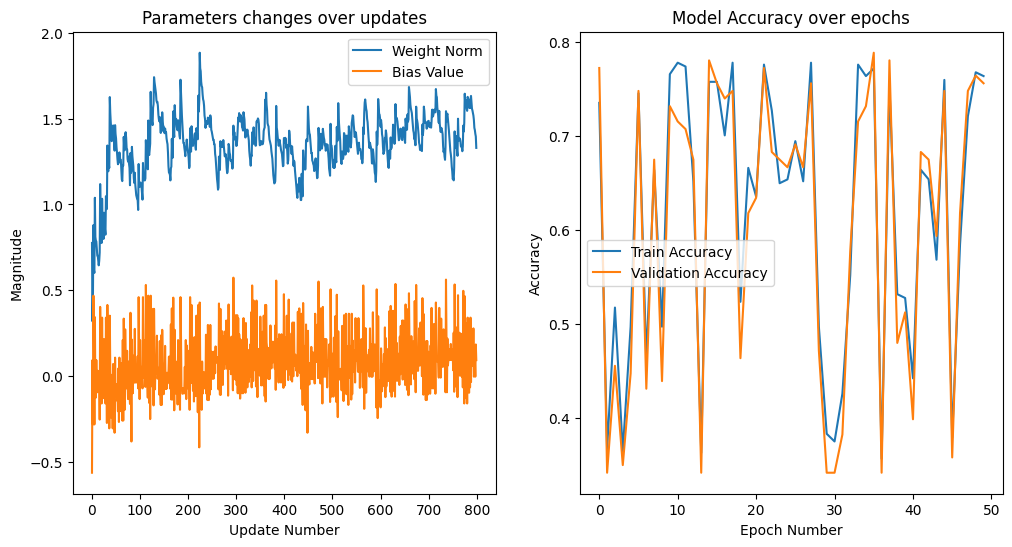

In [378]:
plot_perceptron_history(best_model.history)